# EEG SIGNAL CLASSIFICATION

## ABOUT

**Author :** Ravi Narayana K S

**Date :** 03.07.2024

**Models :** 

* EEGNET
* TSCeption
* CNN
* SVC

## IMPLEMENTATION 

#### **Importing Dependencies :**

In [608]:
import mne
import os
import numpy as np
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix
import matplotlib.pyplot as plt

import tensorflow as tf
import tensorflow as tf
import keras
from keras import ops
from tensorflow.keras import layers, models, Input, backend as K
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, BatchNormalization, DepthwiseConv2D, SeparableConv2D, AveragePooling2D, Flatten, Dense, Dropout, Activation, Reshape

#### **Loading Data :**

*Loading file names :*

In [609]:
data_folder = 'data' # folder containing the data
edf_files_1 = sorted([file for file in os.listdir(data_folder) if file.endswith('_1.edf')]) # rest
edf_files_2 = sorted([file for file in os.listdir(data_folder) if file.endswith('_2.edf')]) # task

*Loading raw(.edf) files :*

*raws1* and *raws2* contain the raw files of class 1 and class 2 respectively

In [610]:
raws1 = [] # rest
for edf_file in edf_files_1:
    raw = mne.io.read_raw_edf(os.path.join(data_folder, edf_file), preload=True)
    raws1.append(raw)

raws2 = [] # task
for edf_file in edf_files_2:
    raw = mne.io.read_raw_edf(os.path.join(data_folder, edf_file), preload=True)
    raws2.append(raw)

Extracting EDF parameters from /Users/rnks/Downloads/iitR internship/data/Subject00_1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 90999  =      0.000 ...   181.998 secs...
Extracting EDF parameters from /Users/rnks/Downloads/iitR internship/data/Subject01_1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 90999  =      0.000 ...   181.998 secs...
Extracting EDF parameters from /Users/rnks/Downloads/iitR internship/data/Subject02_1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 90999  =      0.000 ...   181.998 secs...
Extracting EDF parameters from /Users/rnks/Downloads/iitR internship/data/Subject03_1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 90999  =      0.000 ...   181.998 secs...
Extracting EDF parameters from /Users/rnks/Downloads/iitR internship/dat

**Visualising the loaded data :**

<Info | 8 non-empty values
 bads: []
 ch_names: EEG Fp1, EEG Fp2, EEG F3, EEG F4, EEG F7, EEG F8, EEG T3, EEG ...
 chs: 21 EEG
 custom_ref_applied: False
 highpass: 0.5 Hz
 lowpass: 45.0 Hz
 meas_date: 2011-01-01 00:00:00 UTC
 nchan: 21
 projs: []
 sfreq: 500.0 Hz
 subject_info: 4 items (dict)
>


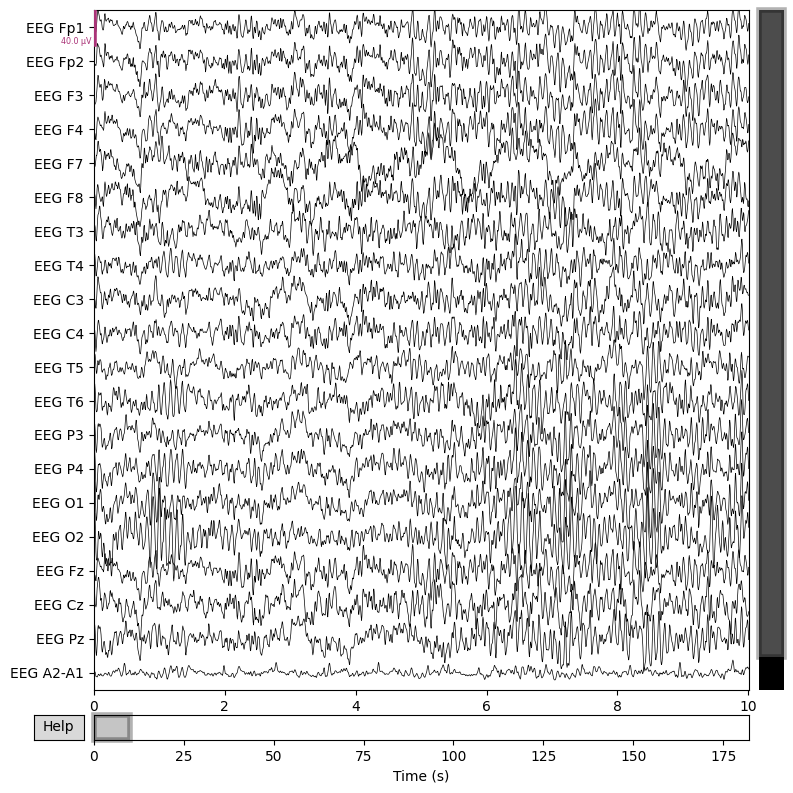

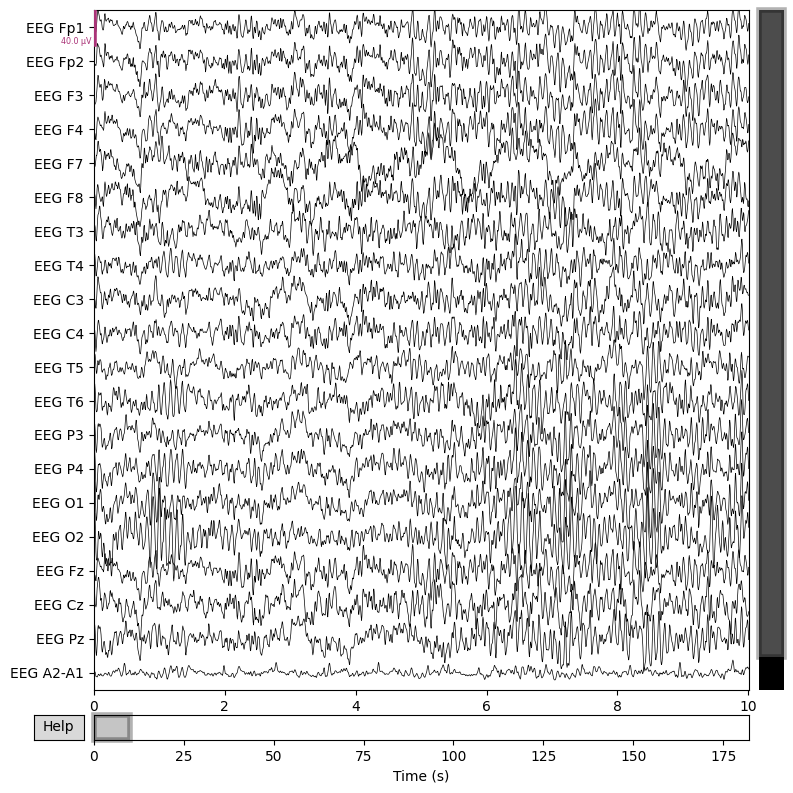

In [611]:
print(raws1[0].info)
plt.close()
raws1[0].plot()

<Info | 8 non-empty values
 bads: []
 ch_names: EEG Fp1, EEG Fp2, EEG F3, EEG F4, EEG F7, EEG F8, EEG T3, EEG ...
 chs: 21 EEG
 custom_ref_applied: False
 highpass: 0.5 Hz
 lowpass: 45.0 Hz
 meas_date: 2011-01-01 00:00:00 UTC
 nchan: 21
 projs: []
 sfreq: 500.0 Hz
 subject_info: 4 items (dict)
>


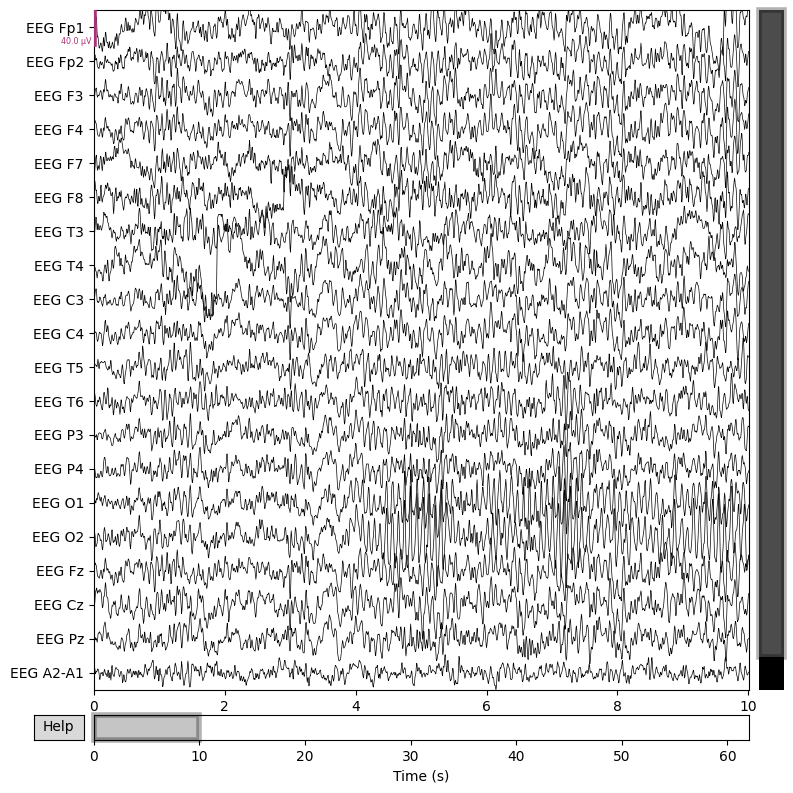

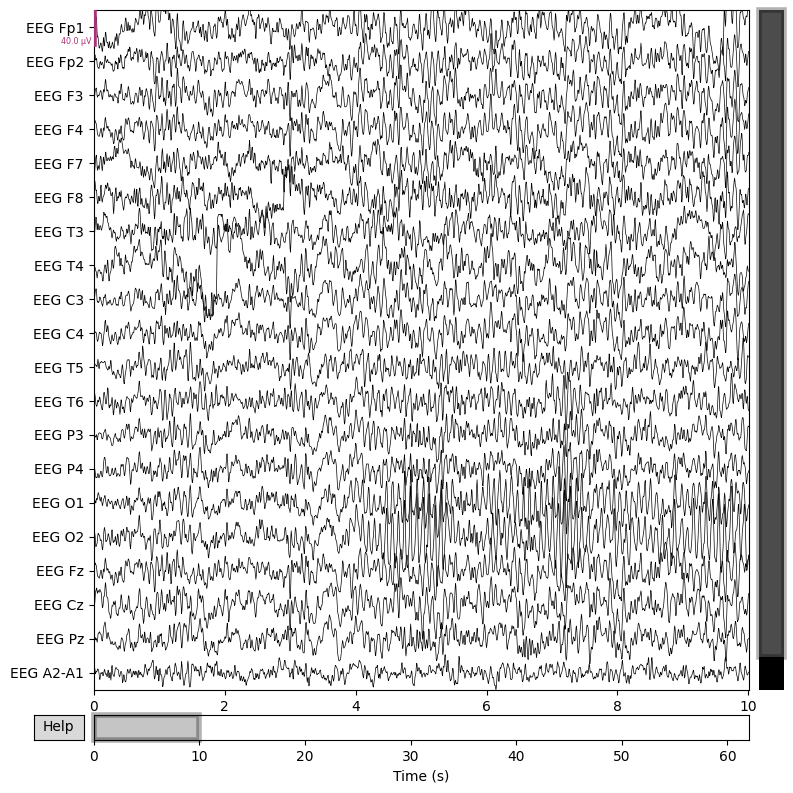

In [612]:
print(raws2[0].info)
plt.close()
raws2[0].plot()

#### **Calculate PSD :**

*rawPSDs1* and *rawPSDs2* contain the PSDs of raw files of class 1 and class 2 respectively

In [613]:
rawPSDs1 = [] # rest
for raw in raws1:
    rawPSD = raw.compute_psd(fmin=0, fmax=100, n_fft=2048)
    rawPSDs1.append(rawPSD)

rawPSDs2 = [] # task
for raw in raws2:
    rawPSD = raw.compute_psd(fmin=0, fmax=100, n_fft=2048)
    rawPSDs2.append(rawPSD)

Effective window size : 4.096 (s)
Effective window size : 4.096 (s)


Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Effective wind

*Visualising PSD for class 1*

<Info | 8 non-empty values
 bads: []
 ch_names: EEG Fp1, EEG Fp2, EEG F3, EEG F4, EEG F7, EEG F8, EEG T3, EEG ...
 chs: 21 EEG
 custom_ref_applied: False
 highpass: 0.5 Hz
 lowpass: 45.0 Hz
 meas_date: 2011-01-01 00:00:00 UTC
 nchan: 21
 projs: []
 sfreq: 500.0 Hz
 subject_info: 4 items (dict)
>
Plotting power spectral density (dB=True).


/var/folders/tx/44n992cx27q28v08nqkpwfqh0000gn/T/ipykernel_1653/2166248626.py:3: FutureWarning: The value of `amplitude='auto'` will be removed in MNE 1.8.0, and the new default will be `amplitude=False`.
  rawPSDs1[0].plot()
/var/folders/tx/44n992cx27q28v08nqkpwfqh0000gn/T/ipykernel_1653/2166248626.py:3: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  rawPSDs1[0].plot()
/Users/rnks/anaconda3/envs/iitR/lib/python3.10/site-packages/mne/viz/utils.py:167: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


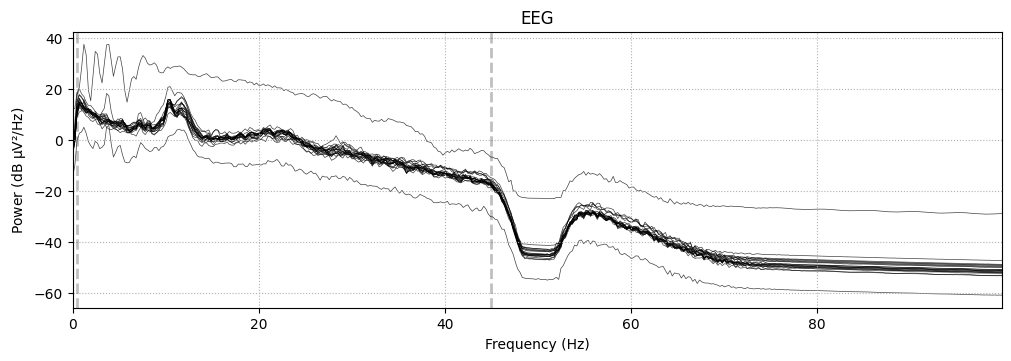

In [614]:
print(rawPSDs1[0].info)
plt.close()
rawPSDs1[0].plot()

*Visualising PSD for class 2*

<Info | 8 non-empty values
 bads: []
 ch_names: EEG Fp1, EEG Fp2, EEG F3, EEG F4, EEG F7, EEG F8, EEG T3, EEG ...
 chs: 21 EEG
 custom_ref_applied: False
 highpass: 0.5 Hz
 lowpass: 45.0 Hz
 meas_date: 2011-01-01 00:00:00 UTC
 nchan: 21
 projs: []
 sfreq: 500.0 Hz
 subject_info: 4 items (dict)
>
Plotting power spectral density (dB=True).


/var/folders/tx/44n992cx27q28v08nqkpwfqh0000gn/T/ipykernel_1653/1840927663.py:3: FutureWarning: The value of `amplitude='auto'` will be removed in MNE 1.8.0, and the new default will be `amplitude=False`.
  rawPSDs2[0].plot()
/var/folders/tx/44n992cx27q28v08nqkpwfqh0000gn/T/ipykernel_1653/1840927663.py:3: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  rawPSDs2[0].plot()
/Users/rnks/anaconda3/envs/iitR/lib/python3.10/site-packages/mne/viz/utils.py:167: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


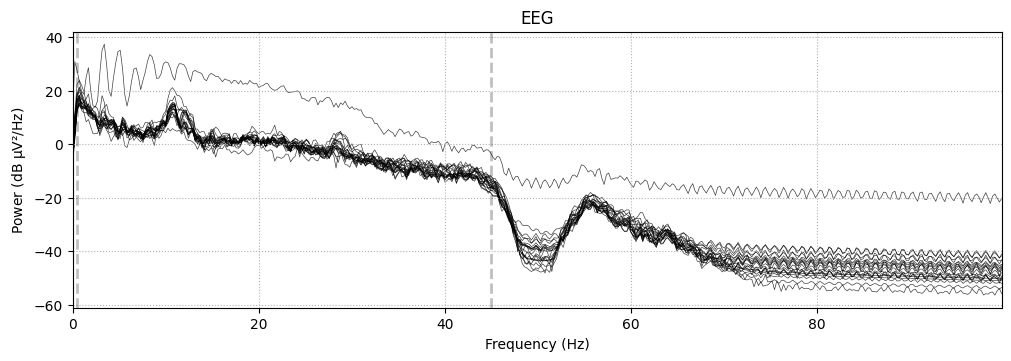

In [615]:
print(rawPSDs2[0].info)
plt.close()
rawPSDs2[0].plot()

*We observe high fluctuation in the data belonging to class 2*

#### **Defining Bands :**

In [616]:
bands = {'Delta': (1, 4), 'Theta': (4, 8), 'Alpha': (8, 12), 'Beta': (12, 30), 'Gamma': (30, 100)}

#### **Calculating bandwise PSD :**

In [617]:
PSDs1 = []
Freqs1 = []

for rawPSD in rawPSDs1:
    PSD, Freq = rawPSD.get_data(return_freqs=True)  
    PSDs1.append(PSD)
    Freqs1.append(Freq)

PSDs2 = []
Freqs2 = []

for rawPSD in rawPSDs2:
    PSD, Freq = rawPSD.get_data(return_freqs=True)  
    PSDs2.append(PSD)
    Freqs2.append(Freq)

*bandPSDs1* and *bandPSDs2* contain the bandwise PSDs of raw files of class 1 and class 2 respectively

In [618]:
bandPSDs1 = [] # rest
for i in range(len(PSDs1)):
    psds = PSDs1[i]
    freqs = Freqs1[i]
    band_psd = {band:[] for band in bands}

    for band, (fmin,fmax) in bands.items():
        idx = np.logical_and(freqs>=fmin,freqs<=fmax)
        band_psd[band] = np.mean(psds[:,idx],axis=1)

    bandPSDs1.append(band_psd)

bandPSDs2 = [] # task
for i in range(len(PSDs2)):
    psds = PSDs2[i]
    freqs = Freqs2[i]
    band_psd = {band:[] for band in bands}

    for band, (fmin,fmax) in bands.items():
        idx = np.logical_and(freqs>=fmin,freqs<=fmax)
        band_psd[band] = np.mean(psds[:,idx],axis=1)

    bandPSDs2.append(band_psd)

#### **Calculating the difference :**

In [619]:
DIFFs = []

for i in range(len(bandPSDs1)):
    DIFF = {band:[] for band in bands}
    for band in bands:
        diff = bandPSDs1[i][band] - bandPSDs2[i][band]
        DIFF[band].append(diff)
    DIFFs.append(DIFF)

**Visualising the difference :**

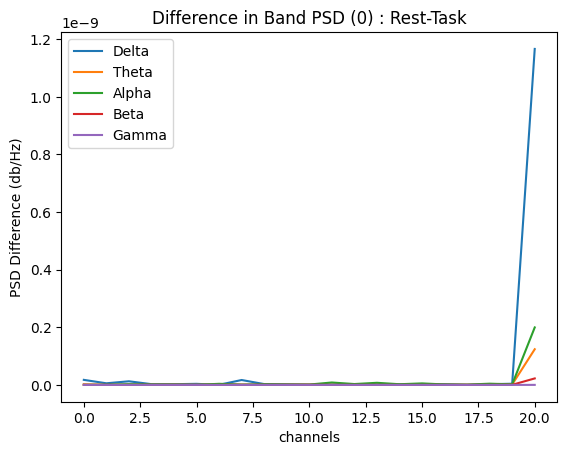

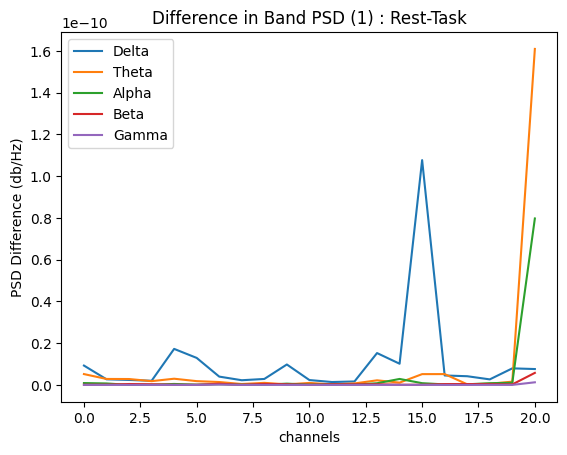

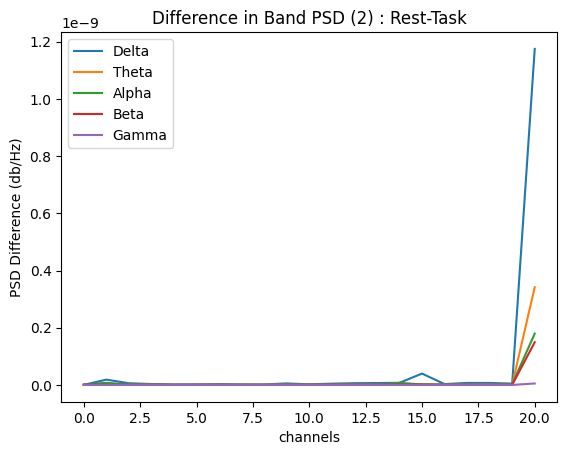

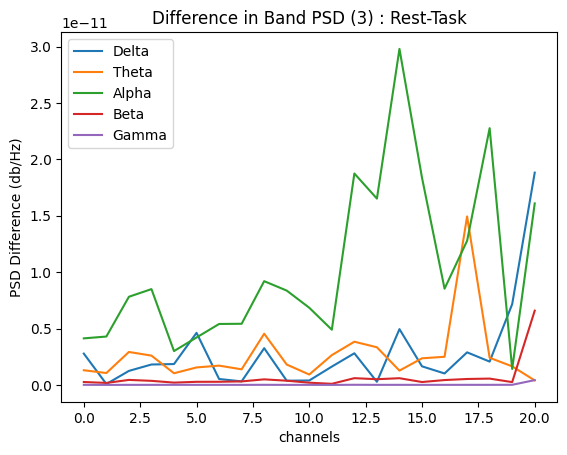

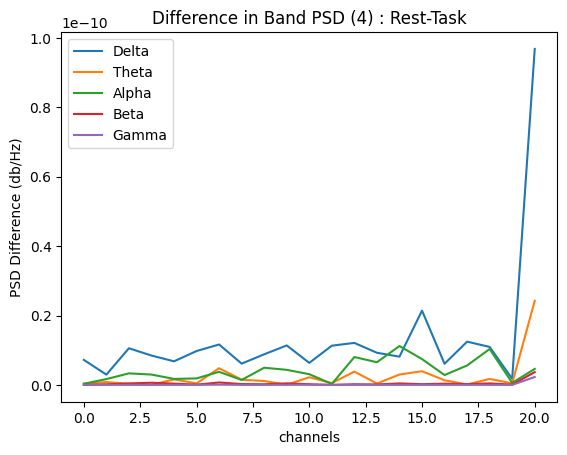

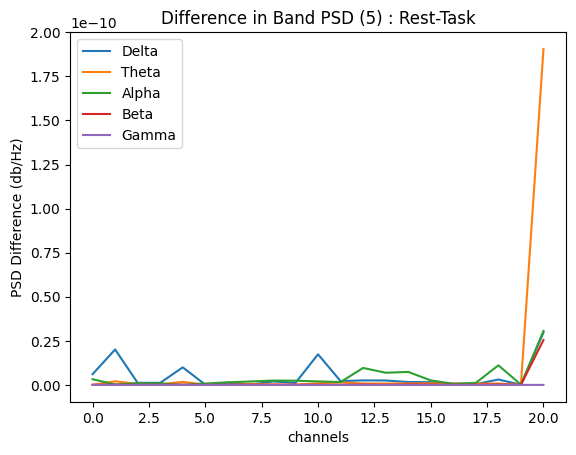

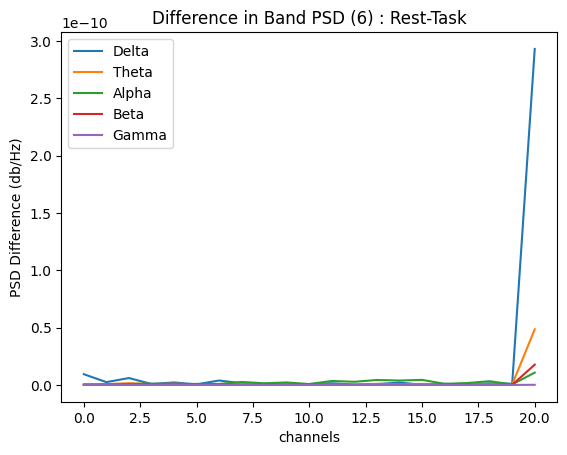

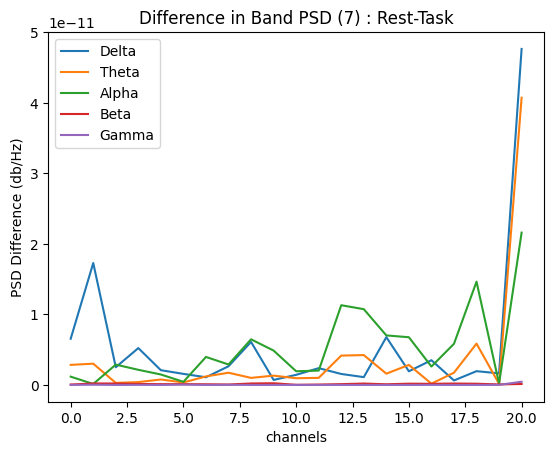

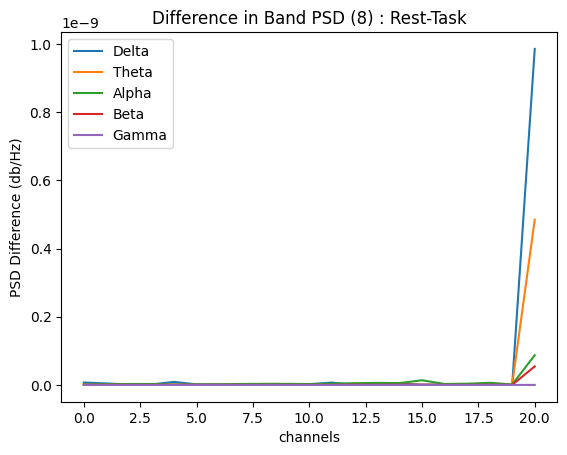

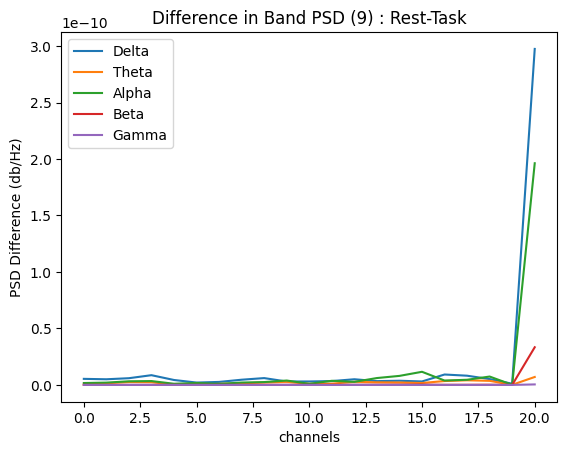

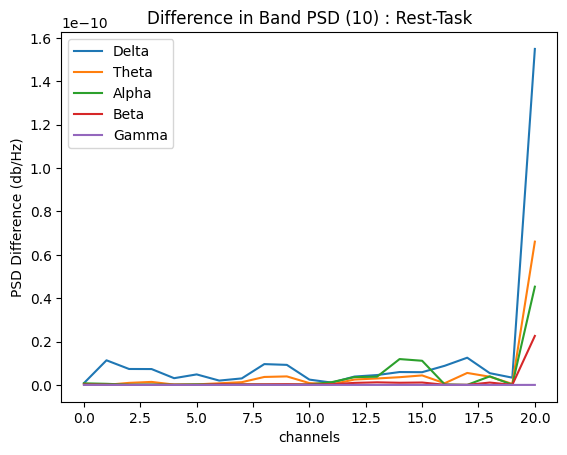

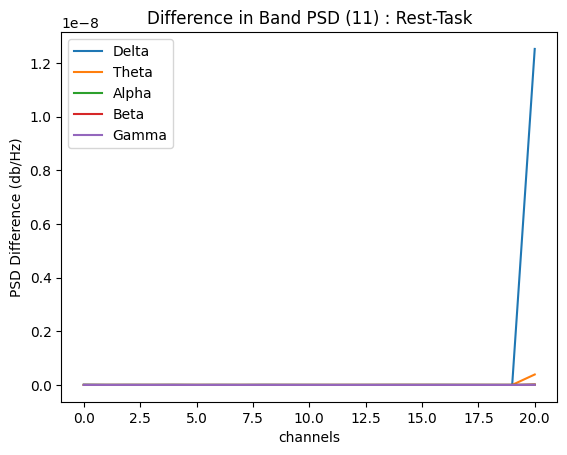

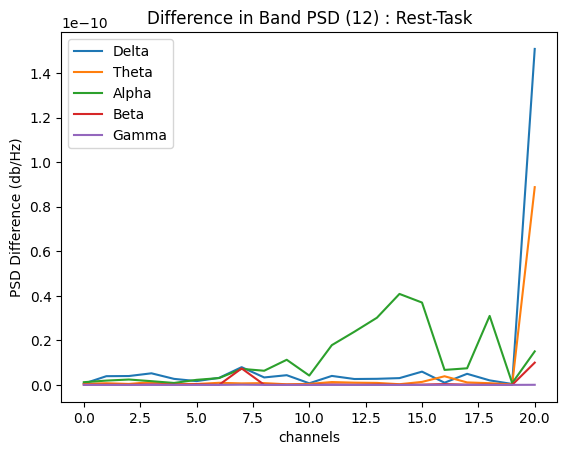

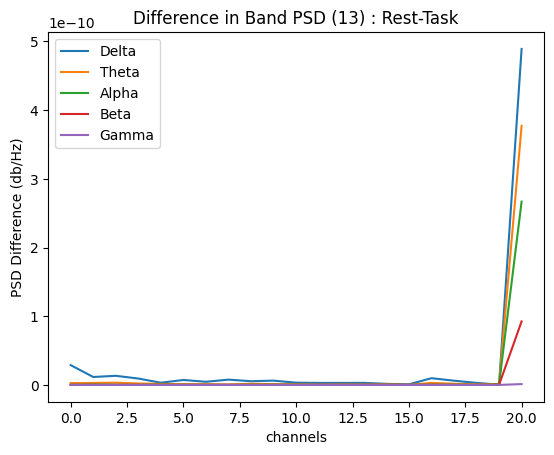

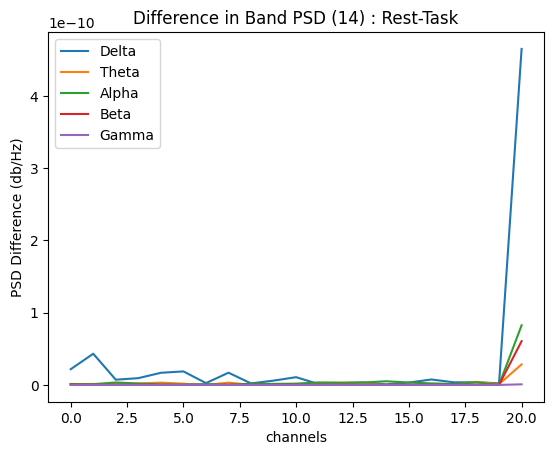

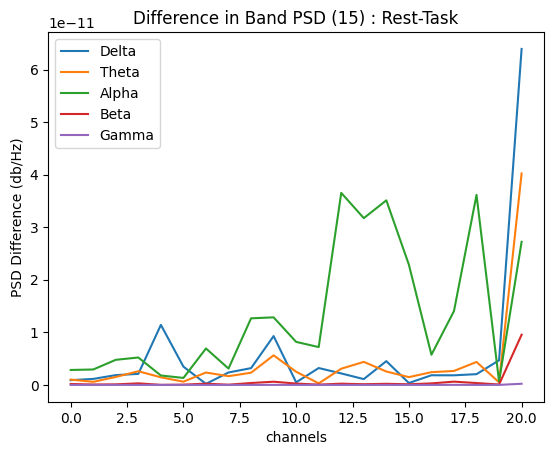

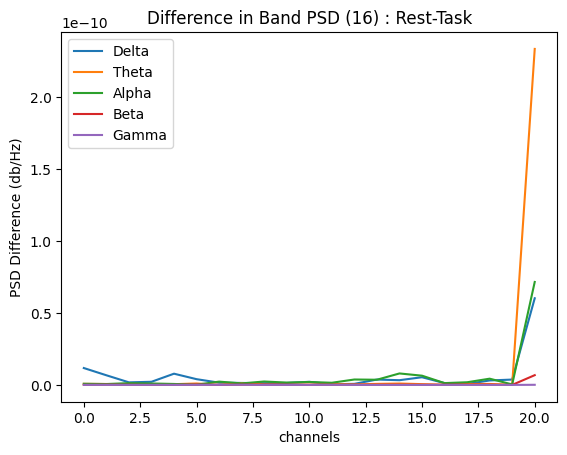

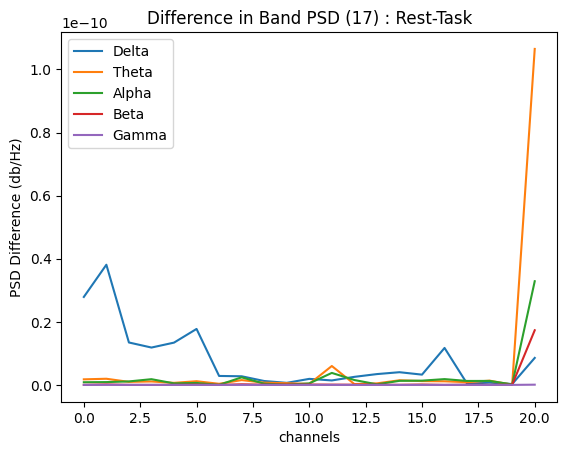

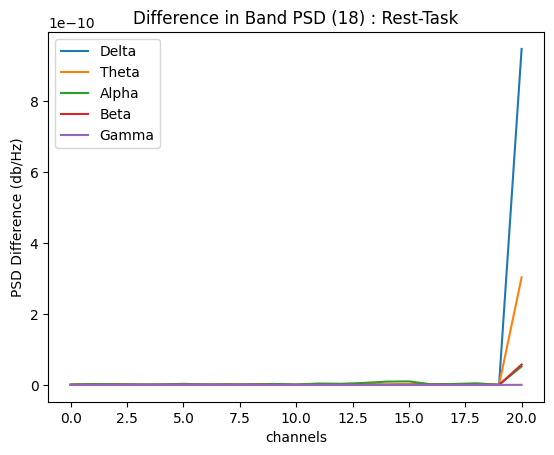

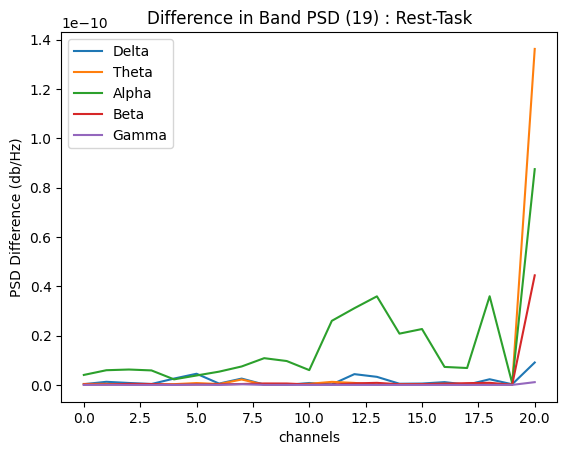

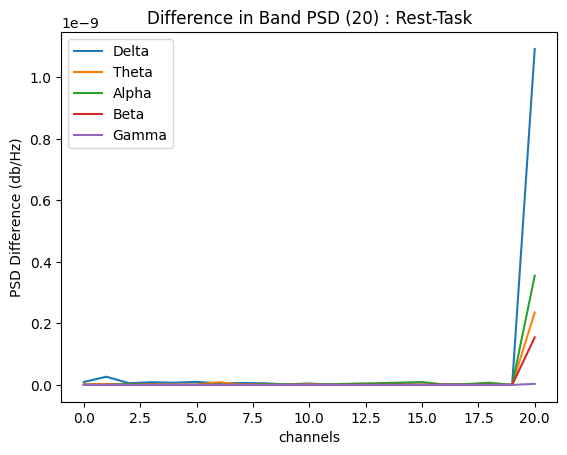

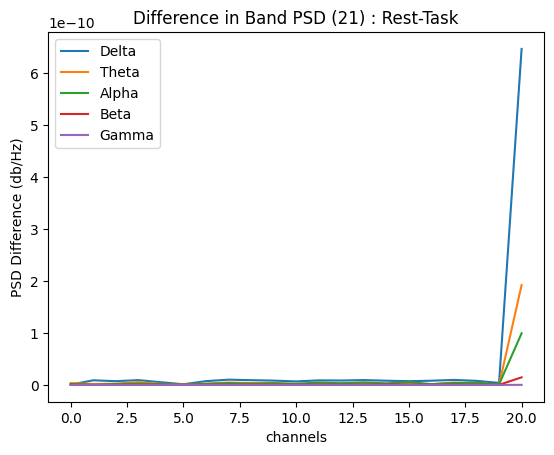

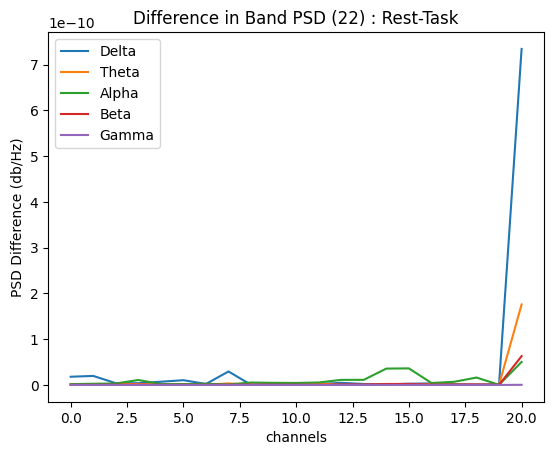

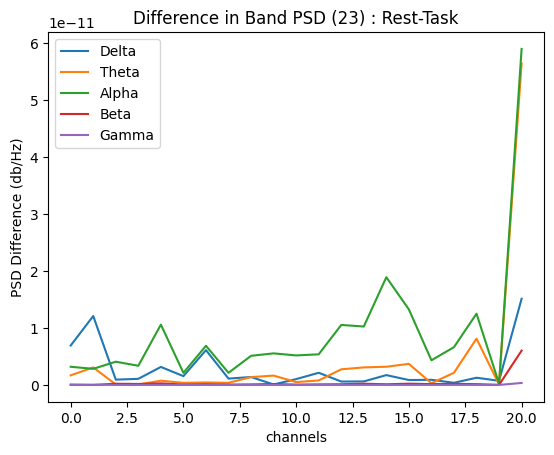

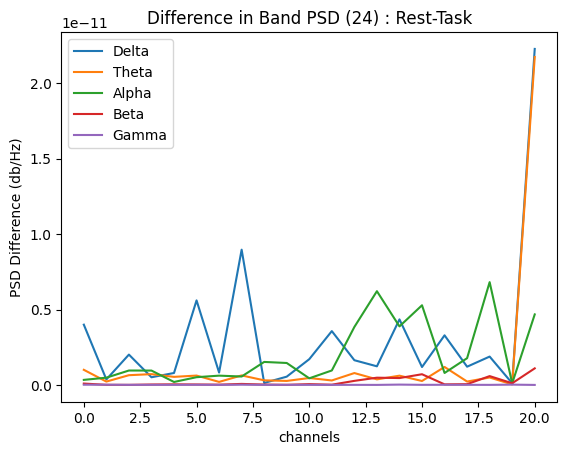

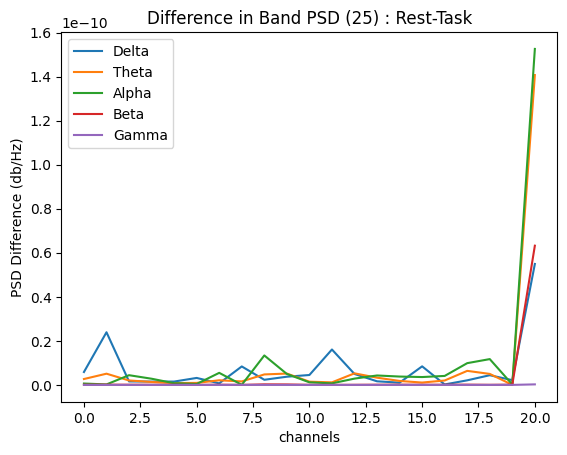

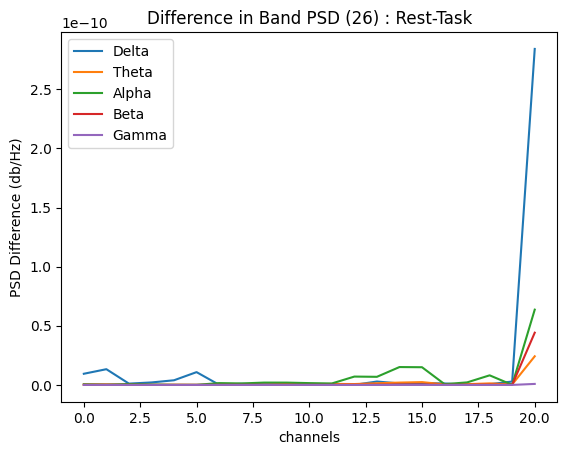

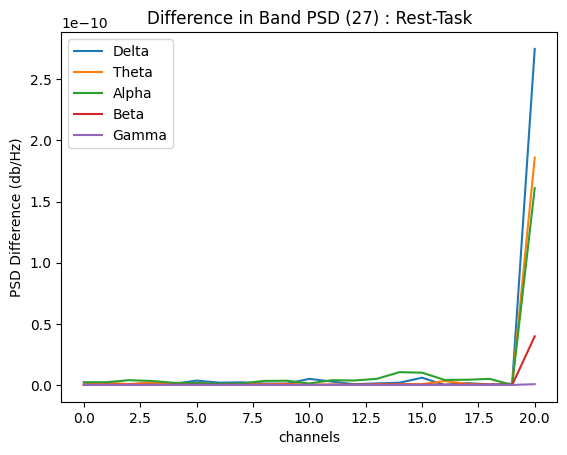

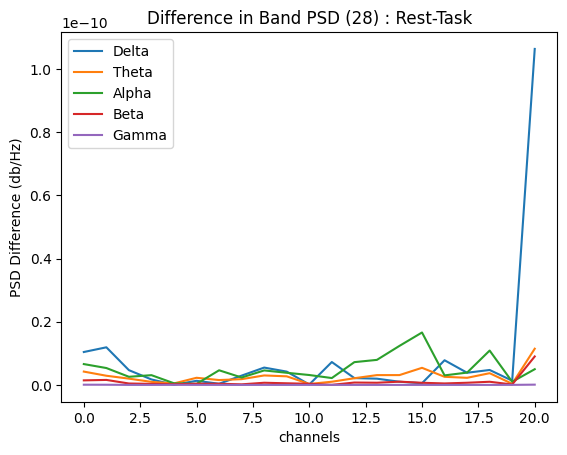

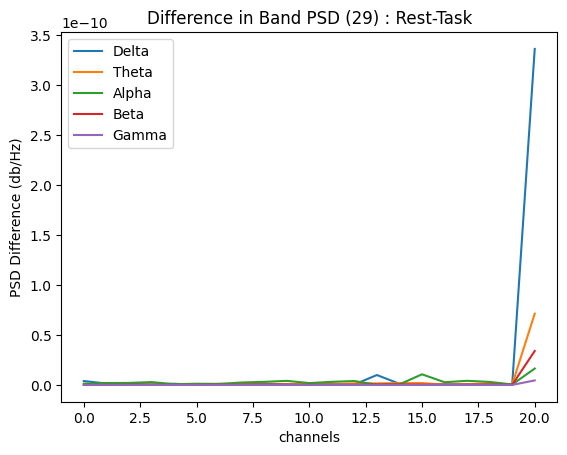

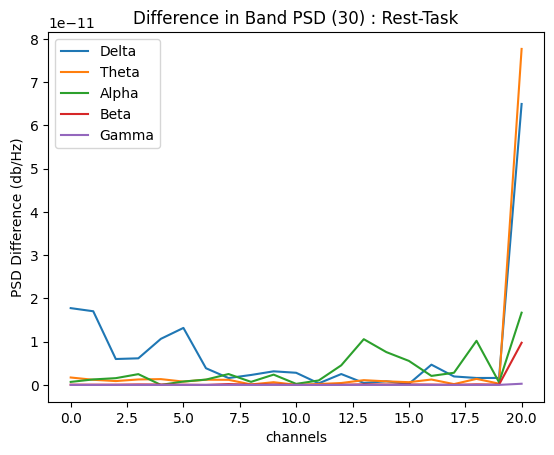

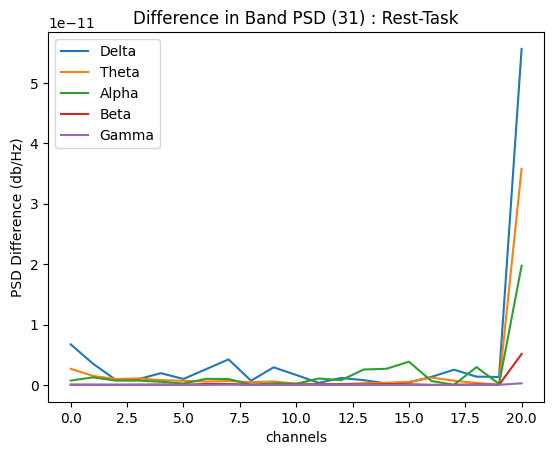

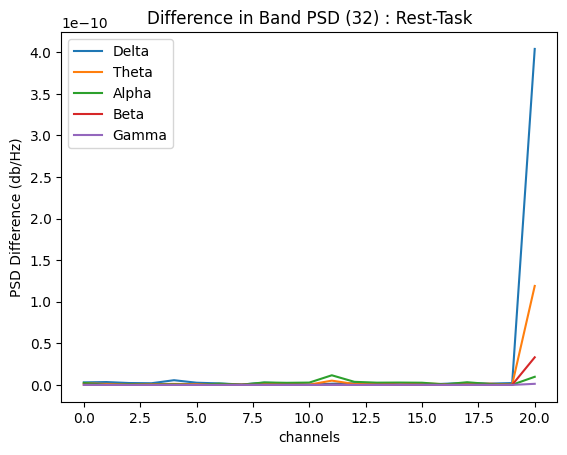

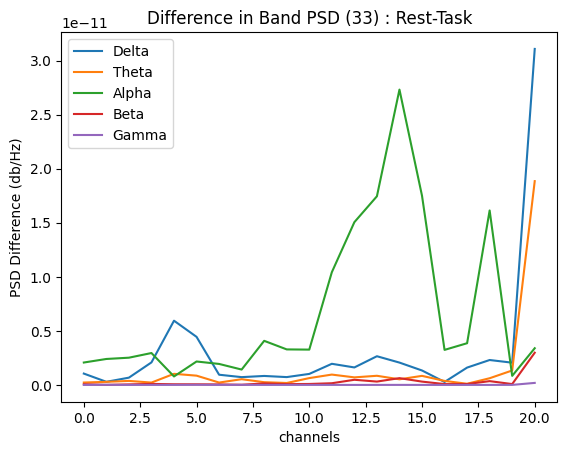

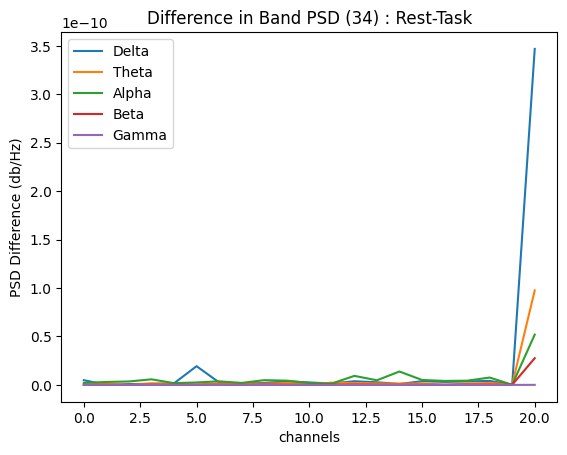

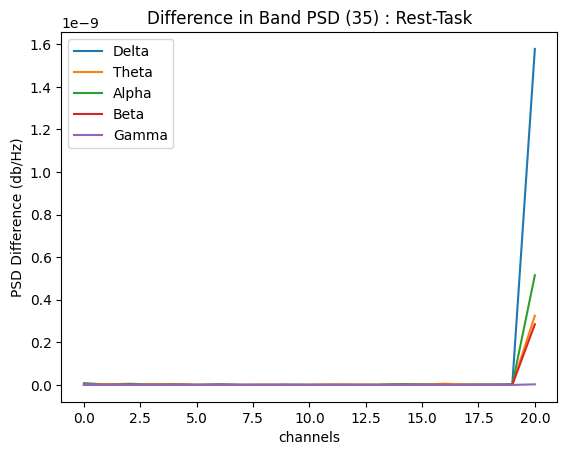

In [620]:
plt.close()
for j in range(len(DIFFs)):
    for i,band in enumerate(bands):
        plt.plot(np.abs(DIFFs[j][band][0]),label=f'{band}')
    plt.title(f'Difference in Band PSD ({j}) : Rest-Task')
    plt.xlabel('channels')
    plt.ylabel('PSD Difference (db/Hz)')
    plt.legend()
    plt.show()
        


*We observe that **ALPHA, THETA and DELTA** bands are sensitive to change of state from rest to task*

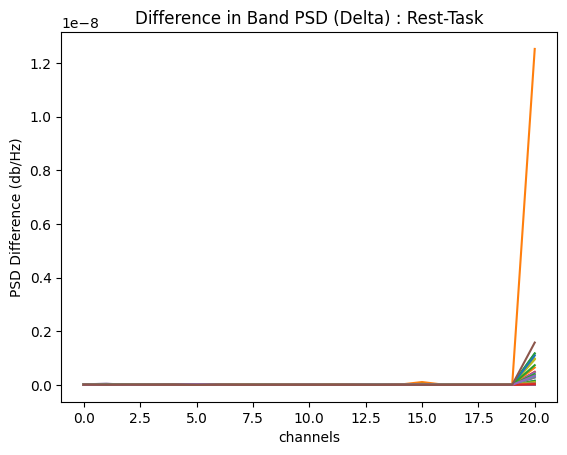

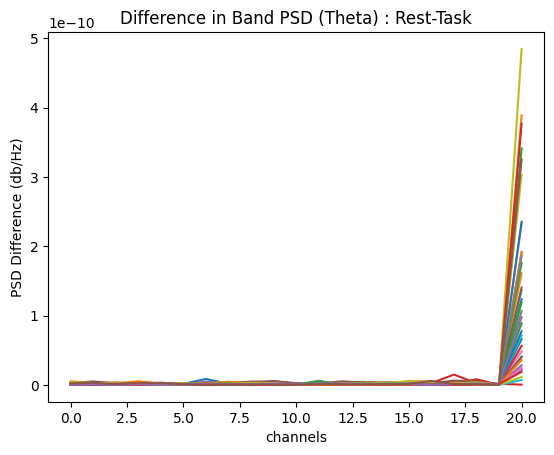

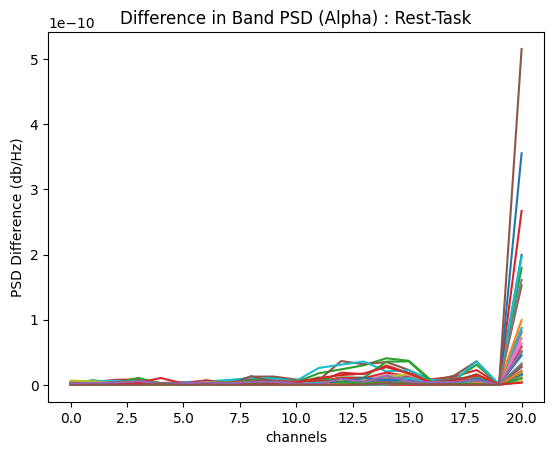

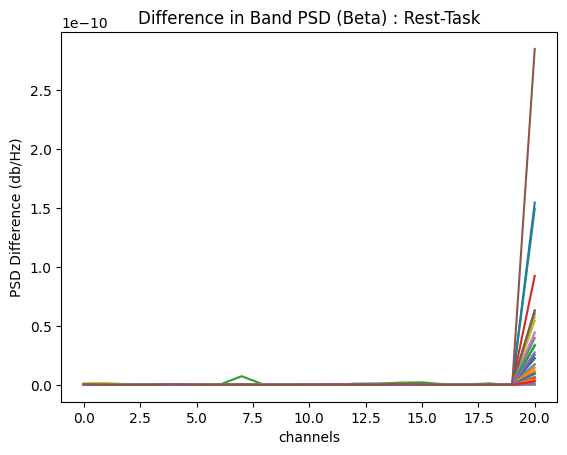

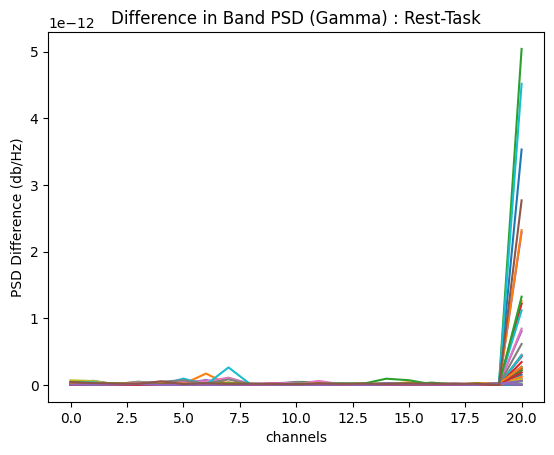

In [621]:
plt.close()
for band in bands:
    for i,j in enumerate(range(len(DIFFs))):
        plt.plot(np.abs(DIFFs[j][band][0]),label=f'{band}')
    plt.title(f'Difference in Band PSD ({band}) : Rest-Task')
    plt.xlabel('channels')
    plt.ylabel('PSD Difference (db/Hz)')
    plt.show()

*We observe that*
* **ALPHA** band signal fluctuation occurs in channels between ~7-20
* **THETA** band signal fluctuation occurs in channels between ~5-8 and ~15-20
* **DELTA** band signal fluctuation occurs in channel 15
* **GAMMA** band signal fluctuation occurs in channels between ~2-18


* 21st Channel shows high fluctuation

#### **Creating dataset for model training :**

This dataset contains the rawPSDs (unlike the one in experimentation that uses bandwise PSDs)

In [622]:
data1 = []
labels1 = []

for i in PSDs1:
    data1.append(i)
    labels1.append(0)

data2 = []
labels2 = []

for i in PSDs2:
    data2.append(i)
    labels2.append(1)

data1 = np.array(data1)
labels1 = np.array(labels1)

data2 = np.array(data2)
labels2 = np.array(labels2)

data1.shape, labels1.shape, data2.shape, labels2.shape

((36, 21, 410), (36,), (36, 21, 410), (36,))

In [623]:
scaler = StandardScaler()
data1 = data1.reshape(-1,21*410)
data2 = data2.reshape(-1,21*410)
data1 = scaler.fit_transform(data1)
data2 = scaler.fit_transform(data2)
data1 = data1.reshape(-1,21,410)
data2 = data2.reshape(-1,21,410)

In [624]:
X_train1 = []
X_test1 = []
y_train1 = []
y_test1 = []

train_size = 0.8

for i in range(int(data1.shape[0]*train_size)):
    X_train1.append(data1[i])
    y_train1.append(int(labels1[i]))
    X_train1.append(data2[i])
    y_train1.append(int(labels2[i]))

for i in range(int(data2.shape[0]*train_size),data2.shape[0]):
    X_test1.append(data1[i])
    y_test1.append(int(labels1[i]))
    X_test1.append(data2[i])
    y_test1.append(int(labels2[i]))

X_train1 = np.array(X_train1)
X_test1 = np.array(X_test1)
y_train1 = np.array(y_train1)
y_test1 = np.array(y_test1)

X_train1.shape, X_test1.shape, y_train1.shape, y_test1.shape

((56, 21, 410), (16, 21, 410), (56,), (16,))

In [625]:
unique_train, counts_train = np.unique(y_train1, return_counts=True)
unique_val, counts_val = np.unique(y_test1, return_counts=True)
print(f'Training set class distribution: {dict(zip(unique_train, counts_train))}')
print(f'Validation set class distribution: {dict(zip(unique_val, counts_val))}')

Training set class distribution: {0: 28, 1: 28}
Validation set class distribution: {0: 8, 1: 8}


#### **Implementing EEGNET :**

**Defining model :**

In [626]:
def EEGNet(nb_classes, Chans = 64, Samples = 128, dropoutRate = 0.2, kernLength = 64, F1 = 8, D = 2, F2 = 16, norm_rate = 0.25):
    model = Sequential()
    model.add(Conv2D(F1, (1, kernLength), padding = 'same', input_shape = (Chans, Samples,1)))
    model.add(BatchNormalization())
    model.add(DepthwiseConv2D((Chans, 1), padding = 'valid', depth_multiplier = D))
    model.add(BatchNormalization())
    model.add(Activation('elu'))
    model.add(AveragePooling2D((1, 4)))
    model.add(Dropout(dropoutRate))
    model.add(SeparableConv2D(F2, (1, 16), padding = 'same'))
    model.add(BatchNormalization())
    model.add(Activation('elu'))
    model.add(AveragePooling2D((1, 8)))
    model.add(Dropout(dropoutRate))
    model.add(Flatten())
    model.add(Dense(nb_classes, activation = 'softmax'))
    return model

**Compiling model :**

In [627]:
model_EEGNET = EEGNet(nb_classes=2, Chans=X_train1.shape[1], Samples=410)
model_EEGNET.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

/Users/rnks/anaconda3/envs/iitR/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


**Training model :**

In [628]:
from sklearn.utils import class_weight

class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_train1), y=y_train1)
class_weights = {i : class_weights[i] for i in range(2)}
model_EEGNET.fit(X_train1, y_train1, batch_size=16, epochs=100, validation_split=0.2, class_weight=class_weights,shuffle=True)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 72ms/step - accuracy: 0.5888 - loss: 0.8602 - val_accuracy: 0.4167 - val_loss: 0.6984
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.5043 - loss: 0.8179 - val_accuracy: 0.4167 - val_loss: 0.6983
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.5384 - loss: 0.8935 - val_accuracy: 0.5000 - val_loss: 0.6976
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.6307 - loss: 0.7934 - val_accuracy: 0.5000 - val_loss: 0.6968
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.3643 - loss: 0.9383 - val_accuracy: 0.4167 - val_loss: 0.6964
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.5462 - loss: 0.7235 - val_accuracy: 0.4167 - val_loss: 0.6963
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.6080 - loss: 0.6472 - val_accuracy: 0.4167 - val_loss: 0.6962
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.7045 - loss: 0.5959 - val_accuracy: 0.4167 - val_loss:

**Evaluating models :**

In [629]:
model_EEGNET.evaluate(X_test1, y_test1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.3750 - loss: 2.2818


[2.2817561626434326, 0.375]

In [630]:
y_hat = model_EEGNET.predict(X_test1)
y_hat = np.argmax(y_hat, axis=1)

print(y_hat == y_test1,'\n')

acc = accuracy_score(y_test1, y_hat)
prec = precision_score(y_test1, y_hat)
rec = recall_score(y_test1, y_hat)
f1 = f1_score(y_test1, y_hat)
con = confusion_matrix(y_test1, y_hat)

print(f'Accuracy: {acc}\nPrecision: {prec}\nRecall: {rec}\nF1: {f1}\nConfusion Matrix: \n{con}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
[False  True False False False  True  True  True False False False  True
  True False False False] 

Accuracy: 0.375
Precision: 0.4
Recall: 0.5
F1: 0.4444444444444444
Confusion Matrix: 
[[2 6]
 [4 4]]


#### **Implementing TSCeption :**

**Defining Model Builders :**

In [631]:
def TSCeptionBlock(input_tensor, filters, kernel_sizes):
    convs = []
    for kernel_size in kernel_sizes:
        conv = layers.Conv2D(filters=filters, kernel_size=(1, kernel_size), padding='same', activation='relu')(input_tensor)
        conv = layers.BatchNormalization()(conv)
        convs.append(conv)
    output = layers.Concatenate(axis=-1)(convs)
    return output

def TSCeptionModel(input_shape, num_classes, num_blocks=3, filters=16, kernel_sizes=[3, 5, 7]):
    input_layer = Input(shape=input_shape)
    
    x = input_layer
    for _ in range(num_blocks):
        x = TSCeptionBlock(x, filters, kernel_sizes)
        x = layers.MaxPooling2D(pool_size=(1, 2))(x)
        filters *= 2

    x = layers.Flatten()(x)
    x = layers.Dense(128, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    output_layer = layers.Dense(num_classes, activation='softmax')(x)

    model = models.Model(inputs=input_layer, outputs=output_layer)
    return model

In [632]:
input_shape = (21, 410, 1)  #(channels, sample, 1)
num_classes = 2

**Compiling Model :**

In [633]:
model_TSC = TSCeptionModel(input_shape, num_classes)
model_TSC.compile(optimizer='adam', loss='sparse_categorical_crossentropy' , metrics=['accuracy'])
model_TSC.summary()

Model: "functional_291"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_238     │ (None, 21, 410,   │          0 │ -                 │
│ (InputLayer)        │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_219 (Conv2D) │ (None, 21, 410,   │         64 │ input_layer_238[… │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_220 (Conv2D) │ (None, 21, 410,   │         96 │ input_layer_238[… │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_221 (Conv2D) │ (None, 21, 410,   │        128 │ input_layer_238[… │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 21, 410,   │         64 │ conv2d_219[0][0]  │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 21, 410,   │         64 │ conv2d_220[0][0]  │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 21, 410,   │         64 │ conv2d_221[0][0]  │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_21      │ (None, 21, 410,   │          0 │ batch_normalizat… │
│ (Concatenate)       │ 48)               │            │ batch_normalizat… │
│                     │                   │            │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_52    │ (None, 21, 205,   │          0 │ concatenate_21[0… │
│ (MaxPooling2D)      │ 48)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_222 (Conv2D) │ (None, 21, 205,   │      4,640 │ max_pooling2d_52… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_223 (Conv2D) │ (None, 21, 205,   │      7,712 │ max_pooling2d_52… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_224 (Conv2D) │ (None, 21, 205,   │     10,784 │ max_pooling2d_52… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 21, 205,   │        128 │ conv2d_222[0][0]  │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 21, 205,   │        128 │ conv2d_223[0][0]  │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 21, 205,   │        128 │ conv2d_224[0][0]  │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_22      │ (None, 21, 205,   │          0 │ batch_normalizat… │
│ (Concatenate)       │ 96)               │            │ batch_normalizat… │
│                     │                   │            │ batch_normalizat

 Total params: 26,438,402 (100.85 MB)

 Trainable params: 26,437,730 (100.85 MB)

 Non-trainable params: 672 (2.62 KB)

**Training Model :**

In [634]:
from sklearn.utils import class_weight

class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_train1), y=y_train1)
class_weights = {i : class_weights[i] for i in range(2)}

history = model_TSC.fit(X_train1, y_train1, epochs=50, batch_size=16, validation_split=0.2, class_weight=class_weights)

Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 377ms/step - accuracy: 0.5994 - loss: 16.5138 - val_accuracy: 0.9167 - val_loss: 0.4365
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 306ms/step - accuracy: 0.8310 - loss: 14.3209 - val_accuracy: 0.7500 - val_loss: 1.8444
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 290ms/step - accuracy: 0.9808 - loss: 4.1254 - val_accuracy: 0.8333 - val_loss: 0.5307
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 281ms/step - accuracy: 1.0000 - loss: 5.7135e-04 - val_accuracy: 0.9167 - val_loss: 0.1711
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 300ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0484
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 299ms/step - accuracy: 1.0000 - loss: 4.1486e-09 - val_accuracy: 1.0000 - val_loss: 0.0089
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 306ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0033
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 313ms/step - accuracy: 0.9886 - loss: 0.5601 - val_accuracy: 

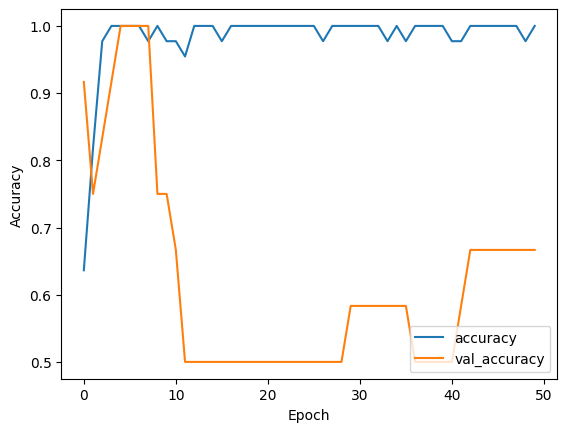

In [635]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

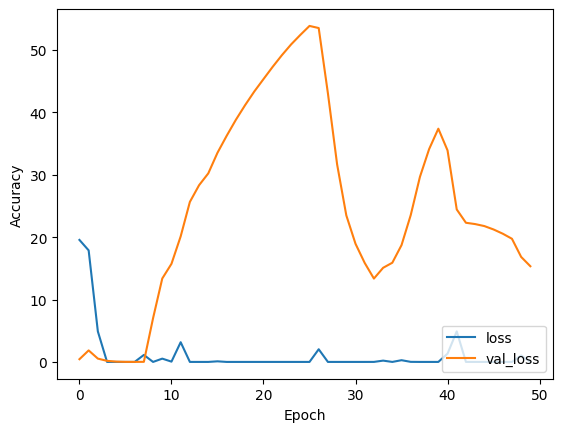

In [636]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

**Evaluating Model :**

In [637]:
model_TSC.evaluate(X_test1, y_test1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - accuracy: 0.6250 - loss: 35.6563


[35.65632629394531, 0.625]

In [638]:
y_hat = model_TSC.predict(X_test1)
y_hat = np.argmax(y_hat, axis=1)

print(y_hat == y_test1,'\n')

acc = accuracy_score(y_test1, y_hat)
prec = precision_score(y_test1, y_hat)
rec = recall_score(y_test1, y_hat)
f1 = f1_score(y_test1, y_hat)
con = confusion_matrix(y_test1, y_hat)

print(f'Accuracy: {acc}\nPrecision: {prec}\nRecall: {rec}\nF1: {f1}\nConfusion Matrix: \n{con}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step
[ True False  True False  True  True  True False  True False  True False
  True  True  True False] 

Accuracy: 0.625
Precision: 1.0
Recall: 0.25
F1: 0.4
Confusion Matrix: 
[[8 0]
 [6 2]]


#### **Implementing Variation Autoencoder :**

In [639]:
class Sampling(layers.Layer):
    """Uses (z_mean, z_log_var) to sample z, the vector encoding a digit."""

    def __init__(self, **kwargs):
        super().__init__(**kwargs)
        self.seed_generator = keras.random.SeedGenerator(1337)

    def call(self, inputs):
        z_mean, z_log_var = inputs
        batch = ops.shape(z_mean)[0]
        dim = ops.shape(z_mean)[1]
        epsilon = keras.random.normal(shape=(batch, dim), seed=self.seed_generator)
        return z_mean + ops.exp(0.5 * z_log_var) * epsilon

**Defining Encoder :**

In [640]:
latent_dim = 2

encoder_inputs = keras.Input(shape=(21,410, 1))
x = layers.Conv2D(32, 3, activation="relu", strides=2, padding="same")(encoder_inputs)
x = layers.Conv2D(64, 3, activation="relu", strides=2, padding="same")(x)
x = layers.Flatten()(x)
x = layers.Dense(16, activation="relu")(x)
z_mean = layers.Dense(latent_dim, name="z_mean")(x)
z_log_var = layers.Dense(latent_dim, name="z_log_var")(x)
z = Sampling()([z_mean, z_log_var])
encoder = keras.Model(encoder_inputs, [z_mean, z_log_var, z], name="encoder")
encoder.summary()

Model: "encoder"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_239     │ (None, 21, 410,   │          0 │ -                 │
│ (InputLayer)        │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_228 (Conv2D) │ (None, 11, 205,   │        320 │ input_layer_239[… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_229 (Conv2D) │ (None, 6, 103,    │     18,496 │ conv2d_228[0][0]  │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_118         │ (None, 39552)     │          0 │ conv2d_229[0][0]  │
│ (Flatten)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_403 (Dense)   │ (None, 16)        │    632,848 │ flatten_118[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ z_mean (Dense)      │ (None, 2)         │         34 │ dense_403[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ z_log_var (Dense)   │ (None, 2)         │         34 │ dense_403[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sampling_60         │ (None, 2)         │          0 │ z_mean[0][0],     │
│ (Sampling)          │                   │            │ z_log_var[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 651,732 (2.49 MB)

 Trainable params: 651,732 (2.49 MB)

 Non-trainable params: 0 (0.00 B)

**Defining Decoder :**

In [641]:
latent_inputs = keras.Input(shape=(latent_dim,))
x = layers.Dense(21*410*64, activation="relu")(latent_inputs)
x = layers.Reshape((21, 410, 64))(x)
x = layers.Conv2DTranspose(32, 3, activation="relu", strides=2, padding="same")(x)
x = layers.Conv2DTranspose(16, 3, activation="relu", strides=2, padding="same")(x)
x = layers.MaxPool2D(4)(x)
decoder_outputs = layers.Conv2DTranspose(1, 3, activation="sigmoid",padding='same')(x)
decoder = keras.Model(latent_inputs, decoder_outputs, name="decoder")
decoder.summary()

Model: "decoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_240 (InputLayer)    │ (None, 2)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_404 (Dense)               │ (None, 551040)         │     1,653,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_150 (Reshape)           │ (None, 21, 410, 64)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_217            │ (None, 42, 820, 32)    │        18,464 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_218            │ (None, 84, 1640, 16)   │         4,624 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_55 (MaxPooling2D) │ (None, 21, 410, 16)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_219            │ (None, 21, 410, 1)     │           145 │
│ (Conv2DTranspose)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,676,353 (6.39 MB)

 Trainable params: 1,676,353 (6.39 MB)

 Non-trainable params: 0 (0.00 B)

**Setting up VAE architecture :**

In [642]:
class VAE(keras.Model):
    def __init__(self, encoder, decoder, **kwargs):
        super().__init__(**kwargs)
        self.encoder = encoder
        self.decoder = decoder
        self.total_loss_tracker = keras.metrics.Mean(name="total_loss")
        self.reconstruction_loss_tracker = keras.metrics.Mean(
            name="reconstruction_loss"
        )
        self.kl_loss_tracker = keras.metrics.Mean(name="kl_loss")

    @property
    def metrics(self):
        return [
            self.total_loss_tracker,
            self.reconstruction_loss_tracker,
            self.kl_loss_tracker,
        ]

    def train_step(self, data):
        with tf.GradientTape() as tape:
            z_mean, z_log_var, z = self.encoder(data)
            reconstruction = self.decoder(z)
            reconstruction_loss = ops.mean(
                ops.sum(
                    keras.losses.binary_crossentropy(data, reconstruction),
                    axis=(1, 2),
                )
            )
            kl_loss = -0.5 * (1 + z_log_var - ops.square(z_mean) - ops.exp(z_log_var))
            kl_loss = ops.mean(ops.sum(kl_loss, axis=1))
            total_loss = reconstruction_loss + kl_loss 
        grads = tape.gradient(total_loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(grads, self.trainable_weights))
        self.total_loss_tracker.update_state(total_loss)
        self.reconstruction_loss_tracker.update_state(reconstruction_loss)
        self.kl_loss_tracker.update_state(kl_loss)
        return {
            "loss": self.total_loss_tracker.result(),
            "reconstruction_loss": self.reconstruction_loss_tracker.result(),
            "kl_loss": self.kl_loss_tracker.result(),
        }

In [643]:
modelVAE = VAE(encoder, decoder)
modelVAE.compile(optimizer=keras.optimizers.Adam())

**Training the model :**

In [644]:
history = modelVAE.fit(np.expand_dims(X_train1, axis=-1), epochs=30, batch_size=128)

Epoch 1/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - kl_loss: 0.0330 - loss: 5970.5503 - reconstruction_loss: 5970.5171
Epoch 2/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - kl_loss: 4.5038 - loss: 5952.2124 - reconstruction_loss: 5947.7085
Epoch 3/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - kl_loss: 4.8098 - loss: 5922.9189 - reconstruction_loss: 5918.1094
Epoch 4/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 950ms/step - kl_loss: 10.1320 - loss: 5876.7256 - reconstruction_loss: 5866.5938
Epoch 5/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 864ms/step - kl_loss: 24.4173 - loss: 5802.6152 - reconstruction_loss: 5778.1978
Epoch 6/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - kl_loss: 55.8630 - loss: 5677.2104 - reconstruction_loss: 5621.3477
Epoch 7/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - kl_loss: 115.8004 - loss: 5467.7222 - reconstruction_loss: 5351.9219
Epoch 8/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - kl_loss: 212.9662 - loss: 5128.5288 - reconstruction_loss: 4915.5625
Epoch 9/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - kl_loss: 3

**Evaluation :**

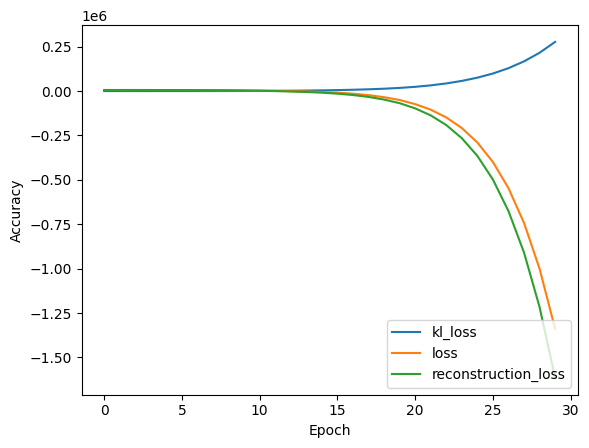

In [645]:
plt.plot(history.history['kl_loss'], label='kl_loss')
plt.plot(history.history['loss'], label = 'loss')
plt.plot(history.history['reconstruction_loss'], label = 'reconstruction_loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

**Plotting latent space :**

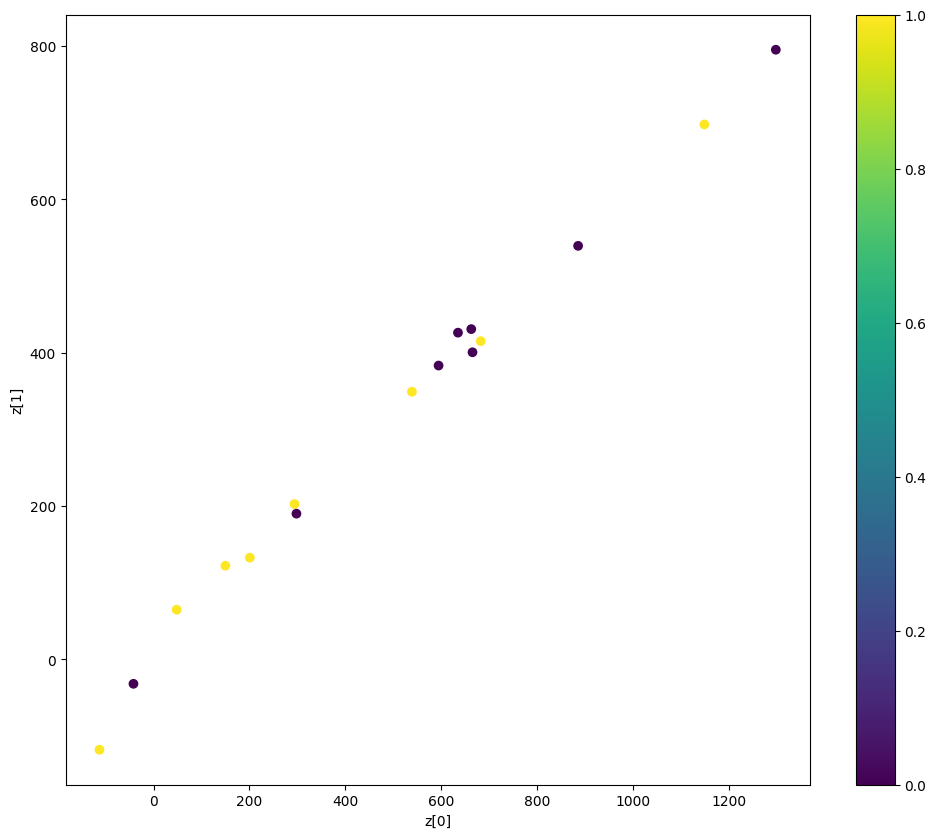

In [646]:
def plot_label_clusters(vae, data, labels):
    # display a 2D plot of the digit classes in the latent space
    z_mean, _, _ = vae.encoder.predict(data, verbose=0)
    plt.figure(figsize=(12, 10))
    plt.scatter(z_mean[:, 0], z_mean[:, 1], c=labels)
    plt.colorbar()
    plt.xlabel("z[0]")
    plt.ylabel("z[1]")
    plt.show()

X_test1 = np.expand_dims(X_test1, -1).astype("float32")

plot_label_clusters(modelVAE, X_test1, y_test1)

# Experimentation :

#### **Creating Processed Dataset for classification :**

This dataset is constructed using bandwise PSDs.

Band-wise PSDs consist of 21 features per band resulting in total of 105 features per smaple.

In [647]:
dataset1 = []
for i in range(len(bandPSDs1)):
    row = []
    for band in bands:
        for j in bandPSDs1[i][band]:
            row.append(j)
    row.append(0)
    dataset1.append(row)

dataset2 = []
for i in range(len(bandPSDs2)):
    row = []
    for band in bands:
        for j in bandPSDs2[i][band]:
            row.append(j)
    row.append(1)
    dataset2.append(row)

In [648]:
dataset1 = np.array(dataset1)
dataset2 = np.array(dataset2)

print(dataset1.shape, dataset2.shape)

(36, 106) (36, 106)


In [649]:
x1 = dataset1[:,:-1]
y1 = dataset1[:,-1]
x2 = dataset2[:,:-1]
y2 = dataset2[:,-1]

scaler = StandardScaler()
x1 = scaler.fit_transform(x1)
x2 = scaler.fit_transform(x2)

**Spliting dataset into training and testing batches :**

*Ensuring equal split of data among the classes to reduce chances of bias*

In [650]:
X_train2 = []
X_test2 = []
y_train2 = []
y_test2 = []

train_size = 0.8

for i in range(int(x1.shape[0]*train_size)):
    X_train2.append(x1[i])
    y_train2.append(int(y1[i]))
    X_train2.append(x2[i])
    y_train2.append(int(y2[i]))

for i in range(int(x1.shape[0]*train_size),x1.shape[0]):
    X_test2.append(x1[i])
    y_test2.append(int(y1[i]))
    X_test2.append(x2[i])
    y_test2.append(int(y2[i]))

X_train2 = np.array(X_train2)
X_test2 = np.array(X_test2)
y_train2 = np.array(y_train2)
y_test2 = np.array(y_test2)

X_train2.shape, X_test2.shape, y_train2.shape, y_test2.shape

((56, 105), (16, 105), (56,), (16,))

In [651]:
unique_train, counts_train = np.unique(y_train2, return_counts=True)
unique_val, counts_val = np.unique(y_test2, return_counts=True)
print(f'Training set class distribution: {dict(zip(unique_train, counts_train))}')
print(f'Validation set class distribution: {dict(zip(unique_val, counts_val))}')

Training set class distribution: {0: 28, 1: 28}
Validation set class distribution: {0: 8, 1: 8}


#### **Implementing Convolution model :**

**Defining model :**

In [652]:
modelCNN = Sequential()
modelCNN.add(Reshape((15, 7, 1), input_shape=(105,)))
modelCNN.add(Conv2D(64, (2,2), padding='same', activation='relu'))
modelCNN.add(BatchNormalization())
modelCNN.add(AveragePooling2D(pool_size=(2,2)))
modelCNN.add(Dropout(0.2))
modelCNN.add(Conv2D(32, (2,2), padding='same', activation='relu'))
modelCNN.add(BatchNormalization())
modelCNN.add(AveragePooling2D(pool_size=(2,2)))
modelCNN.add(Dropout(0.5))
modelCNN.add(Flatten())
modelCNN.add(Dense(2, activation='softmax'))

/Users/rnks/anaconda3/envs/iitR/lib/python3.10/site-packages/keras/src/layers/reshaping/reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


**Compiling Model :**

In [653]:
modelCNN.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
modelCNN.summary()

Model: "sequential_39"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ reshape_151 (Reshape)           │ (None, 15, 7, 1)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_230 (Conv2D)             │ (None, 15, 7, 64)      │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_119         │ (None, 15, 7, 64)      │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_40            │ (None, 7, 3, 64)       │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_48 (Dropout)            │ (None, 7, 3, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_231 (Conv2D)             │ (None, 7, 3, 32)       │         8,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_120         │ (None, 7, 3, 32)       │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_41            │ (None, 3, 1, 32)       │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_49 (Dropout)            │ (None, 3, 1, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_119 (Flatten)           │ (None, 96)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_405 (Dense)               │ (None, 2)              │           194 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,122 (35.63 KB)

 Trainable params: 8,930 (34.88 KB)

 Non-trainable params: 192 (768.00 B)

In [654]:
history = modelCNN.fit(X_train2, y_train2, batch_size=32, epochs=100, validation_split=0.2, shuffle=True)

Epoch 1/100


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step - accuracy: 0.4186 - loss: 1.1667 - val_accuracy: 0.4167 - val_loss: 0.6977
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6534 - loss: 0.8440 - val_accuracy: 0.4167 - val_loss: 0.6972
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6326 - loss: 0.7377 - val_accuracy: 0.3333 - val_loss: 0.6970
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4129 - loss: 0.9072 - val_accuracy: 0.5000 - val_loss: 0.6975
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5559 - loss: 0.8399 - val_accuracy: 0.5000 - val_loss: 0.6976
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5871 - loss: 0.9164 - val_accuracy: 0.5000 - val_loss: 0.6968
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6581 - loss: 0.8479 - val_accuracy: 0.5833 - val_loss: 0.6961
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6790 - loss: 0.6865 - val_accuracy: 0.5000 - val_loss: 0.6959
Epoc

**Analysing training vs validation curves for accuacy and loss :**

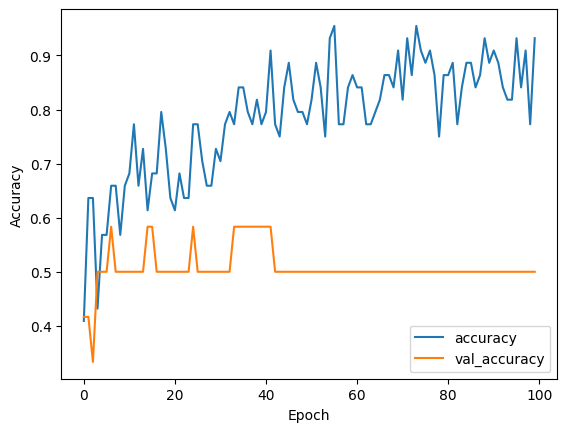

In [655]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

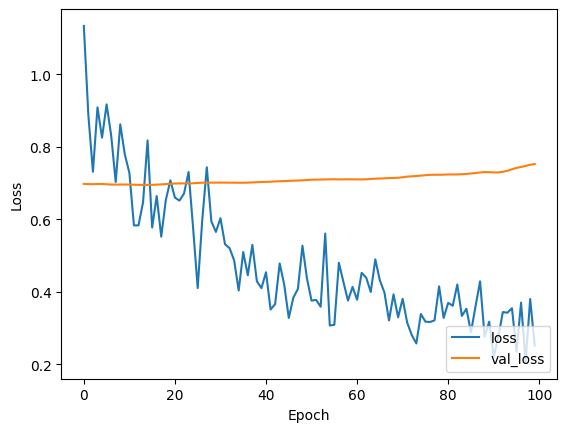

In [656]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='lower right')
plt.show()

**Evaluating model :**

In [657]:
modelCNN.evaluate(X_test2, y_test2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5000 - loss: 0.7861


[0.7860628366470337, 0.5]

In [658]:
y_hat = modelCNN.predict(X_test2)
y_hat = np.argmax(y_hat, axis=1)

print(y_hat == y_test2,'\n')

acc = accuracy_score(y_test2, y_hat)
prec = precision_score(y_test2, y_hat)
rec = recall_score(y_test2, y_hat)
f1 = f1_score(y_test2, y_hat)
con = confusion_matrix(y_test2, y_hat)

print(f'Accuracy: {acc}\nPrecision: {prec}\nRecall: {rec}\nF1: {f1}\nConfusion Matrix: \n{con}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
[ True False  True False  True False  True False  True False  True False
  True False  True False] 

Accuracy: 0.5
Precision: 0.0
Recall: 0.0
F1: 0.0
Confusion Matrix: 
[[8 0]
 [8 0]]


/Users/rnks/anaconda3/envs/iitR/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


#### **Implementing SVC model :**

In [659]:
svc_clf = SVC()

svc_clf.fit(X_train2, y_train2)

y_hat = svc_clf.predict(X_test2)

print(y_hat == y_test2,'\n')

acc = accuracy_score(y_test2, y_hat)
prec = precision_score(y_test2, y_hat)
rec = recall_score(y_test2, y_hat)
f1 = f1_score(y_test2, y_hat)
con = confusion_matrix(y_test2, y_hat)

print(f'Accuracy: {acc}\nPrecision: {prec}\nRecall: {rec}\nF1: {f1}\nConfusion Matrix: \n{con}')

[ True False  True False  True False  True False  True False  True False
  True False  True False] 

Accuracy: 0.5
Precision: 0.0
Recall: 0.0
F1: 0.0
Confusion Matrix: 
[[8 0]
 [8 0]]


/Users/rnks/anaconda3/envs/iitR/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### Analysing trends in plot of difference in PSD of class 1 and class 2 :

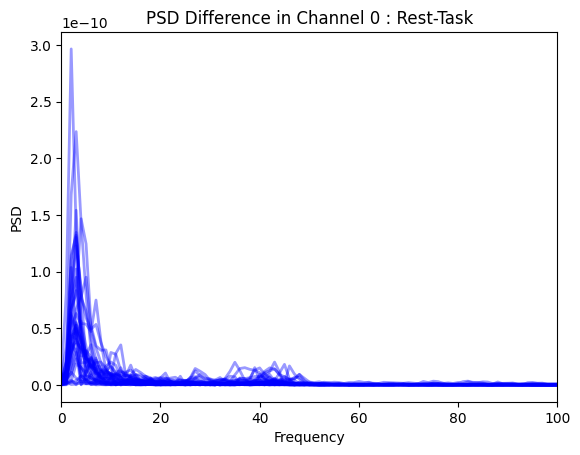

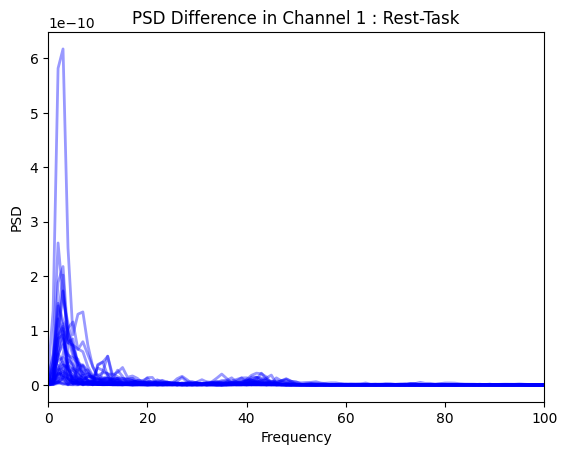

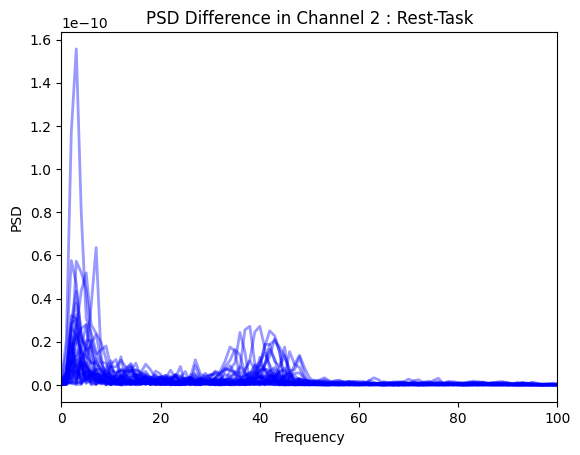

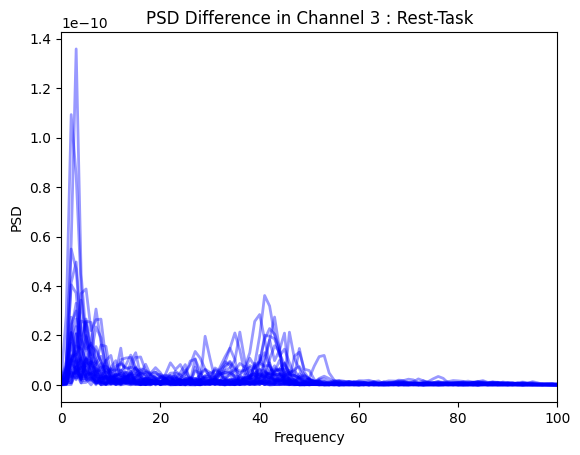

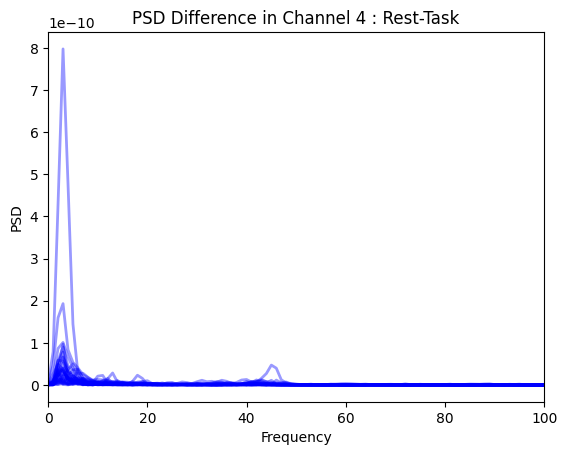

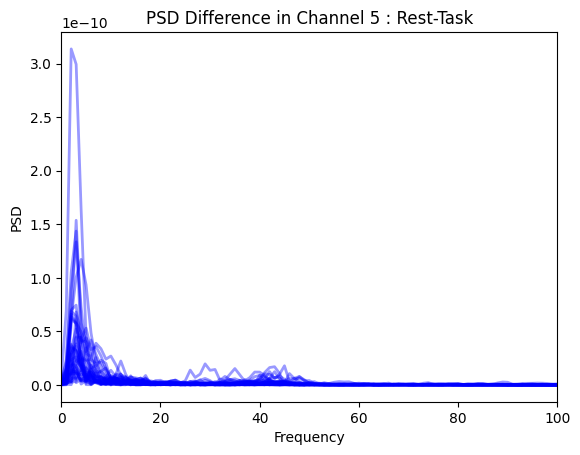

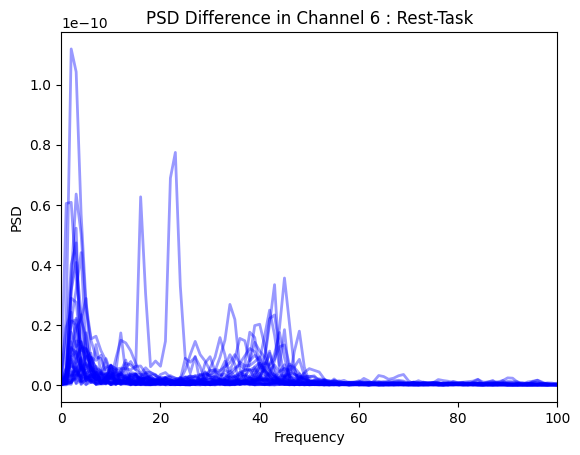

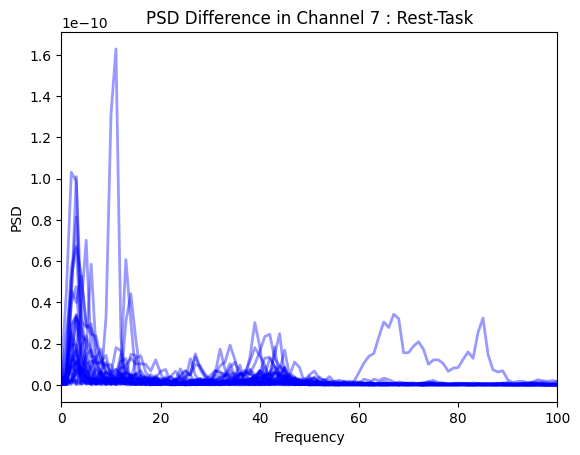

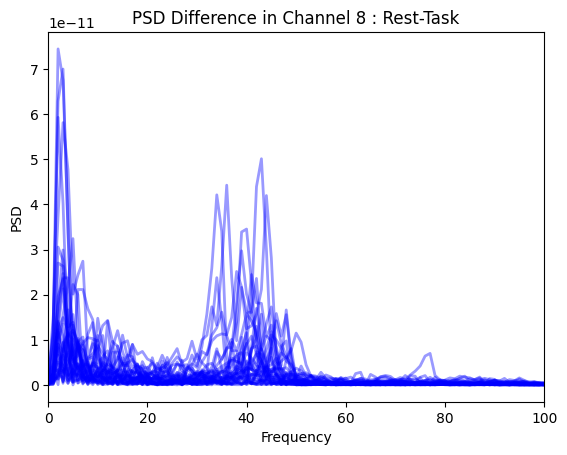

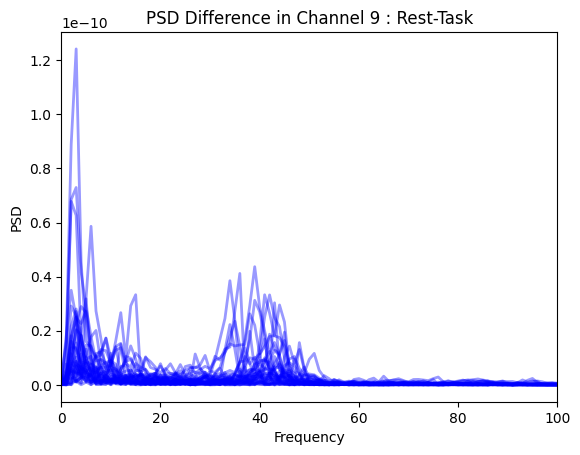

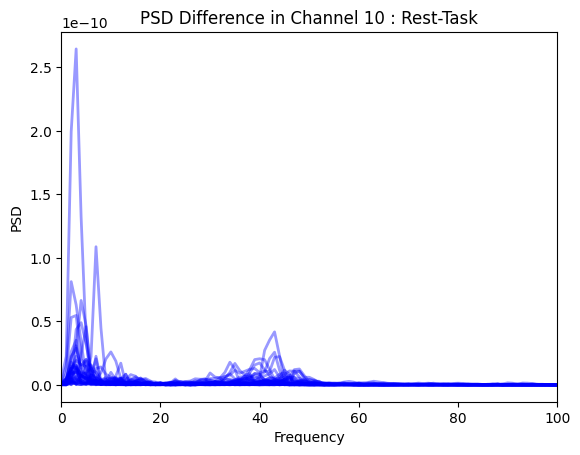

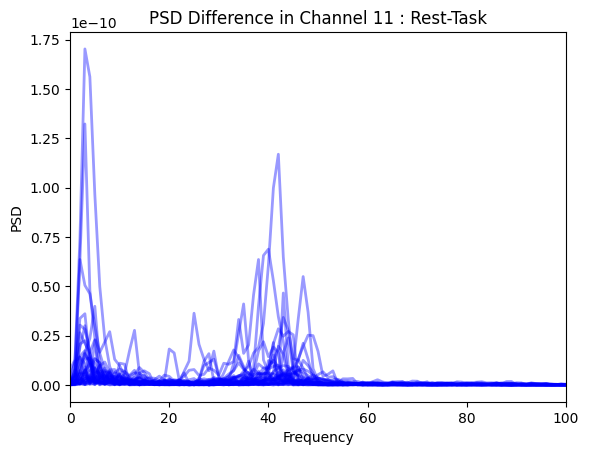

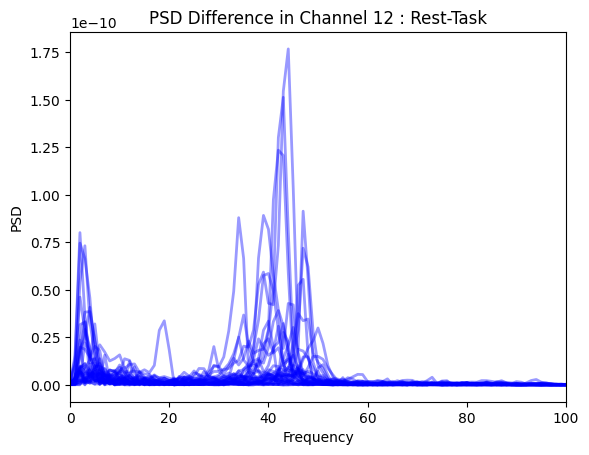

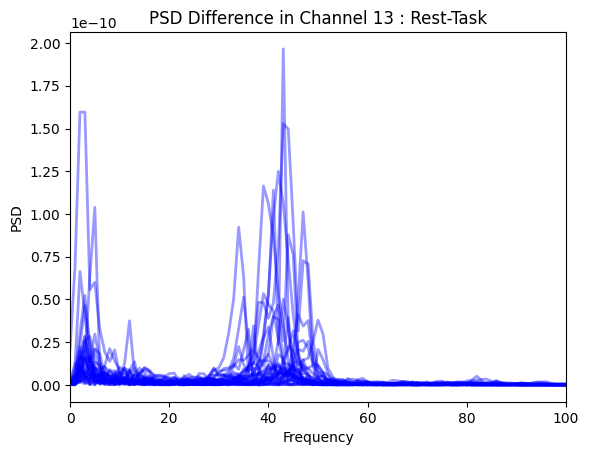

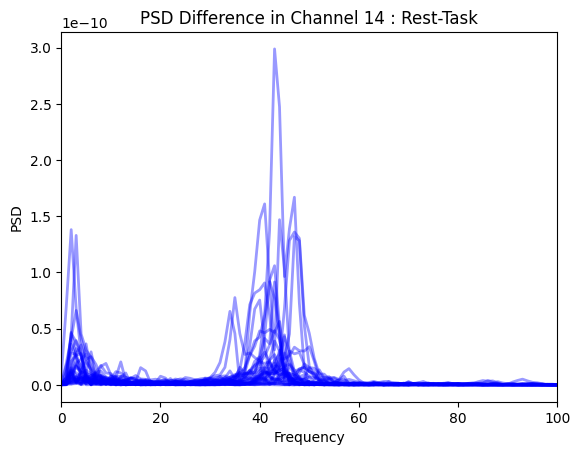

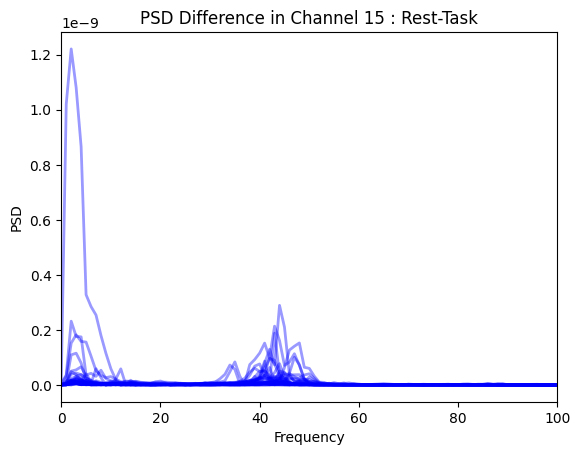

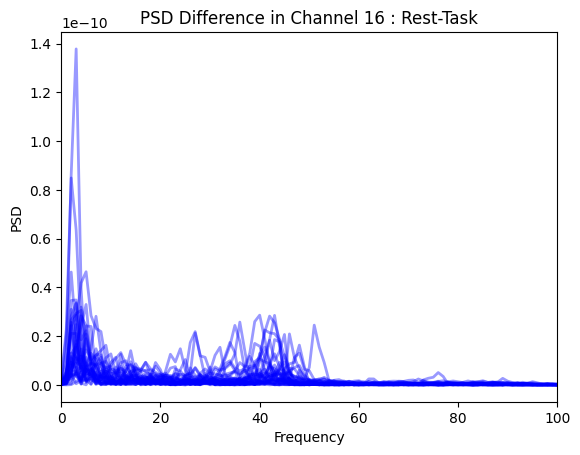

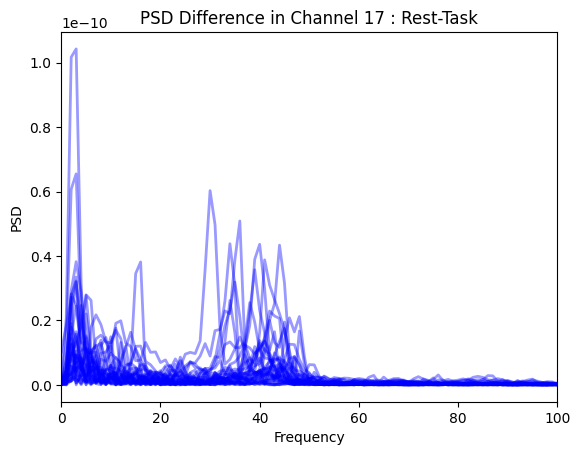

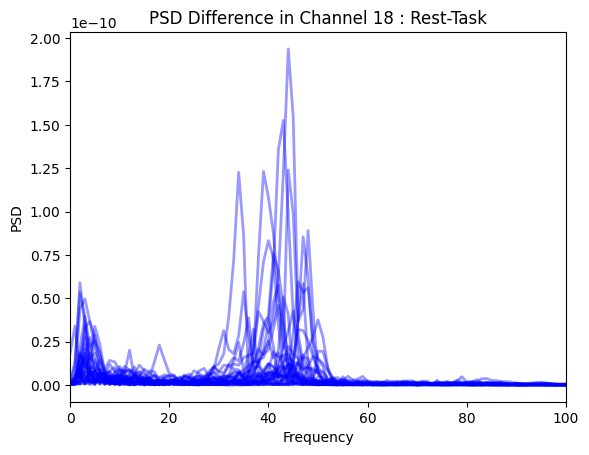

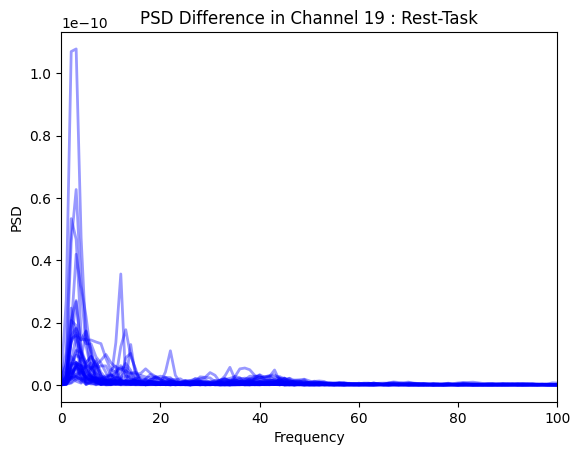

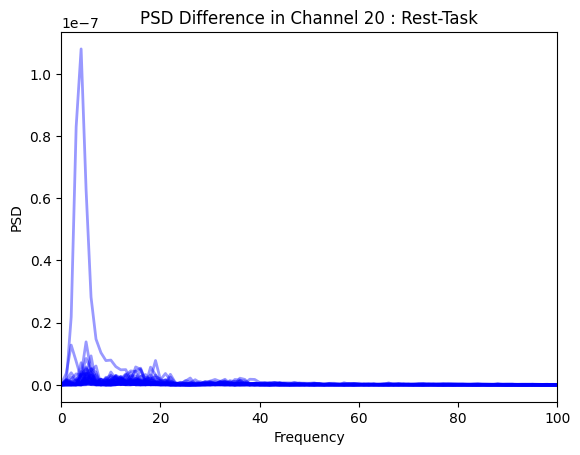

In [660]:
for i in range(21):
    for j in range(len(rawPSDs1)):
        test1 = [i for i in rawPSDs1[j][i][0]]
        test2 = [i for i in rawPSDs2[j][i][0]]

        len(test1), len(test2)  
        test1 = np.array(test1)
        test2 = np.array(test2)

        plt.plot(np.abs(test1-test2),color='b', label='rest',alpha=0.4,linewidth=2)
        #plt.plot(test2,color='r', label='task')
        plt.title(f'PSD Difference in Channel {i} : Rest-Task')
        plt.xlabel('Frequency')
        plt.ylabel('PSD')    
        plt.xlim(0,100)
    plt.show()

*We observe high activity in the frequency range of **0-10Hz and 30-60Hz***

Thus the response of bands in that frequency range needs to be studied.

# RESULTS

1. With Respect to Data

    * Upon analysing the PSD trends of two classes, it is observed that the PSD curve of class 2 (task) is noisy.

    * Upon analysing the bandwise PSD and comparing bandwise PSDs of two classes, we observe that the ALPHA, THETA and DELTA bands fluctuate more than other bands.

    * The above inference brings up to conclusion that these bands are sensitive to change of state (0 -> 1).

    * Analysing the visualisations of difference between the bandwise PSDs we observe lot of fluctuations in data of 21st channel.

    * This work uses two datasets,

        * Dataset 1 : Data shape - (n,21,410) - used for training EEGNET, TSCeption, VAE
        * Dataset 2 : Data shape - (n,105) - used for training CNN, SVC

2. With Respect to Models Trained

    * The EEGNET model trains well in short span of time with training accuracy up to 65% and validation accuracy of about 45%.

    * The TSCeption model also performs similarly with testing accuracy of 62.5%.

    * The VAE model performs well, and the latent space embeddings show a linear trend in the embeddings.

    * The much simplar CNN model used gives output simliar to the previous models with testing accuracy of 50%. (trained on dataset 2)

    * The SVC model performs similar to the CNN model, with sensitivity to being biased. 

3. With Respect to Model Evaluation

    * Upon close inspection of model traing history, we observe that the models are overfitting and hence doesnt generalise properly.

    * It is also observed that the models tend to be biased if the data is not split equally.

    * This can be inferred by looking at training_acc >> validation_acc and testing_acc << groungTruth_acc.

    * Regularisation used did reduce overfitting partially, but overfitting does persist. Thus the overfitting can be removed only by increasing number of records in data.

4. With Respect to Experimentation

    * Upon exploring cleaning and reordering the PSD for eeg signal, the processed dataset consists of each record of shape (21,410,1).

    * A simple CNN trained on this dataset performs as good as models discussed earlier with respect to the same sklearn.metrics

    * Processing data in time domain fails either due to memory constraints or due to processing limiatations

    * Band-wise PSD feature extraction reduces the dimentionality of data, and negates the need to build complex models.